### 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다. 

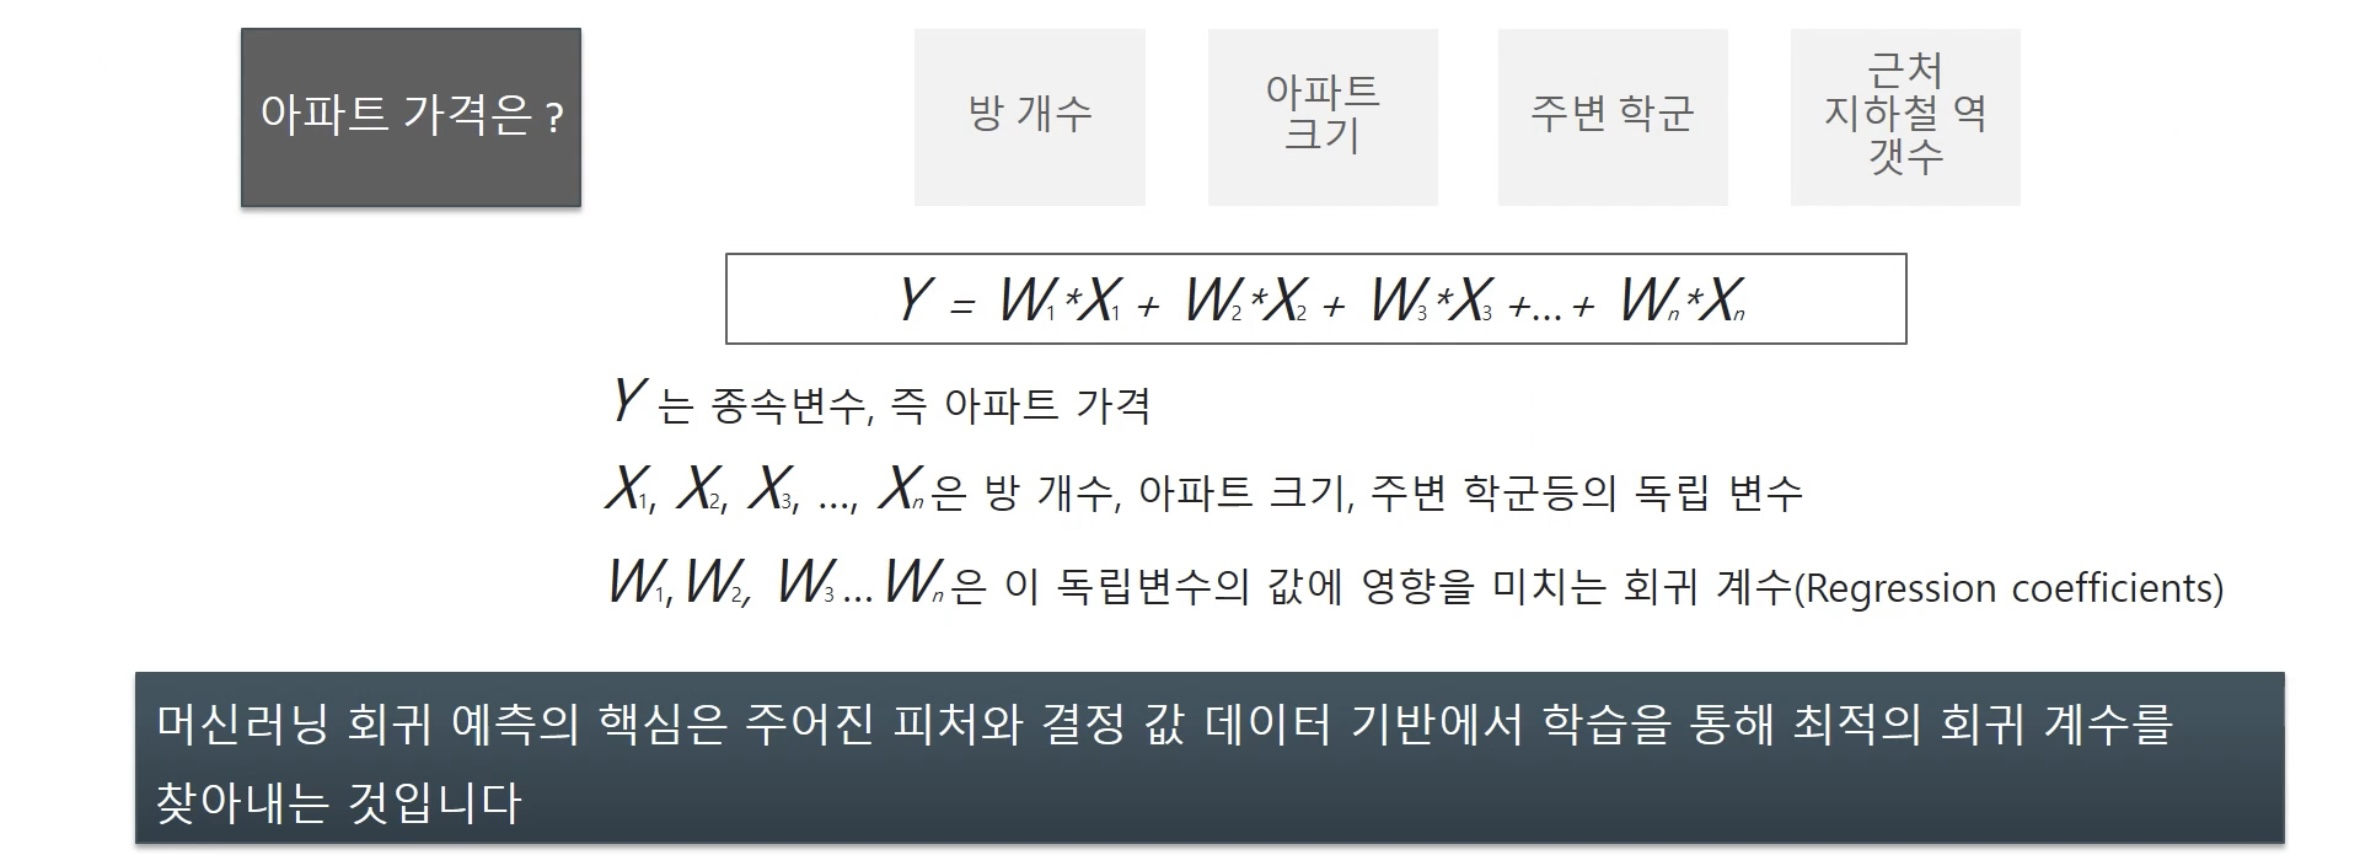

# 회귀의 유형 

* 회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있다.   
회귀에서 가장 중요한 것은 바로 회귀 계수!!    
이 회귀 계수가 '선형적으로 결합이 되있냐'에 따라 선형 회귀와 비선형 회귀로 나뉜다.   
( 정형 데이터일 경우 선형 회귀가 비선형 회귀보다 예측 결과가 좋음 )   


# 선형 회귀의 종류 
* 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델이다.
* 릿지(Ridge): 릿지 회귀는 선형 회귀에 L2규제를 추가한 회귀 모델이다.
* 라쏘(Lasso): 라쏘 회귀는 선형 회귀에 L1규제를 적용한 방식이다.
* 엘라스틱넷(ElasticNet): L2,L1 규제를 함께 결합한 모델이다.
* 로지스틱 회귀(Logistic Regression): 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델이다.

# 단순 선형 회귀 (Simple Regression)
주택 가격이 주택의 크기로만 결정 되는 단순 선형 회귀로 가정하면 아래와 같이 주택 가격은 주택 크기에 대해 선형(직선 형태)의 관계로 표현할 수 있다.  
머신러닝은 실제값과 오류값의 차이를 작게 만드는 예측 모델을 찾는 것.
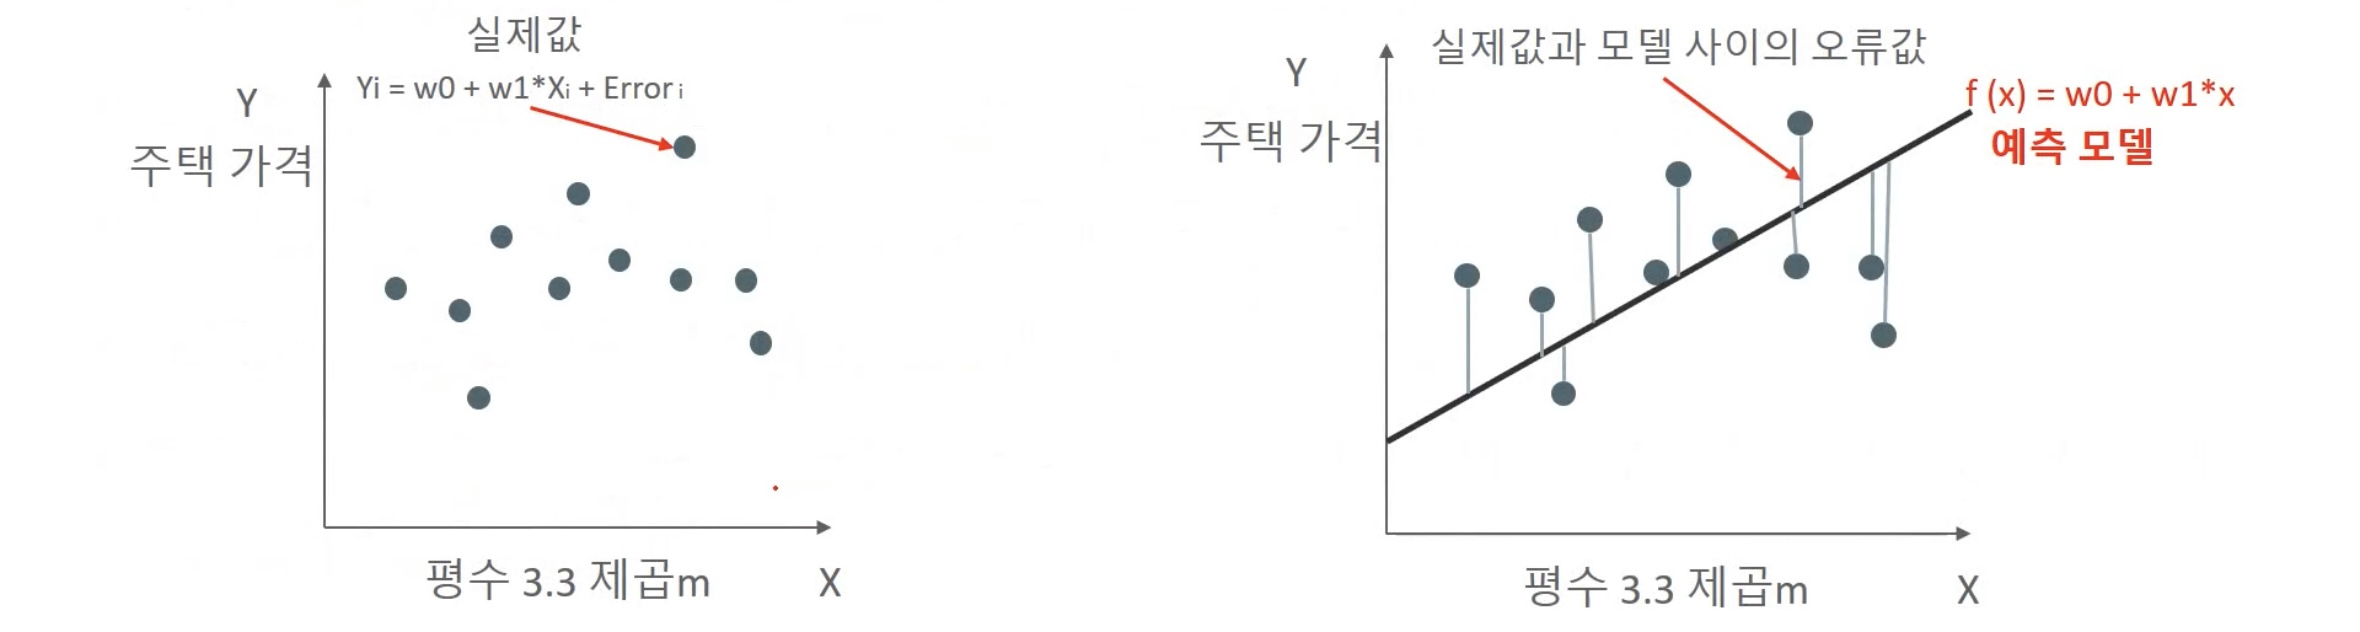
최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류 값)합이 최소가 되는 모델을 만든다는 의미이다.  
동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다. 

## RSS 기반의 회귀 오류 추정

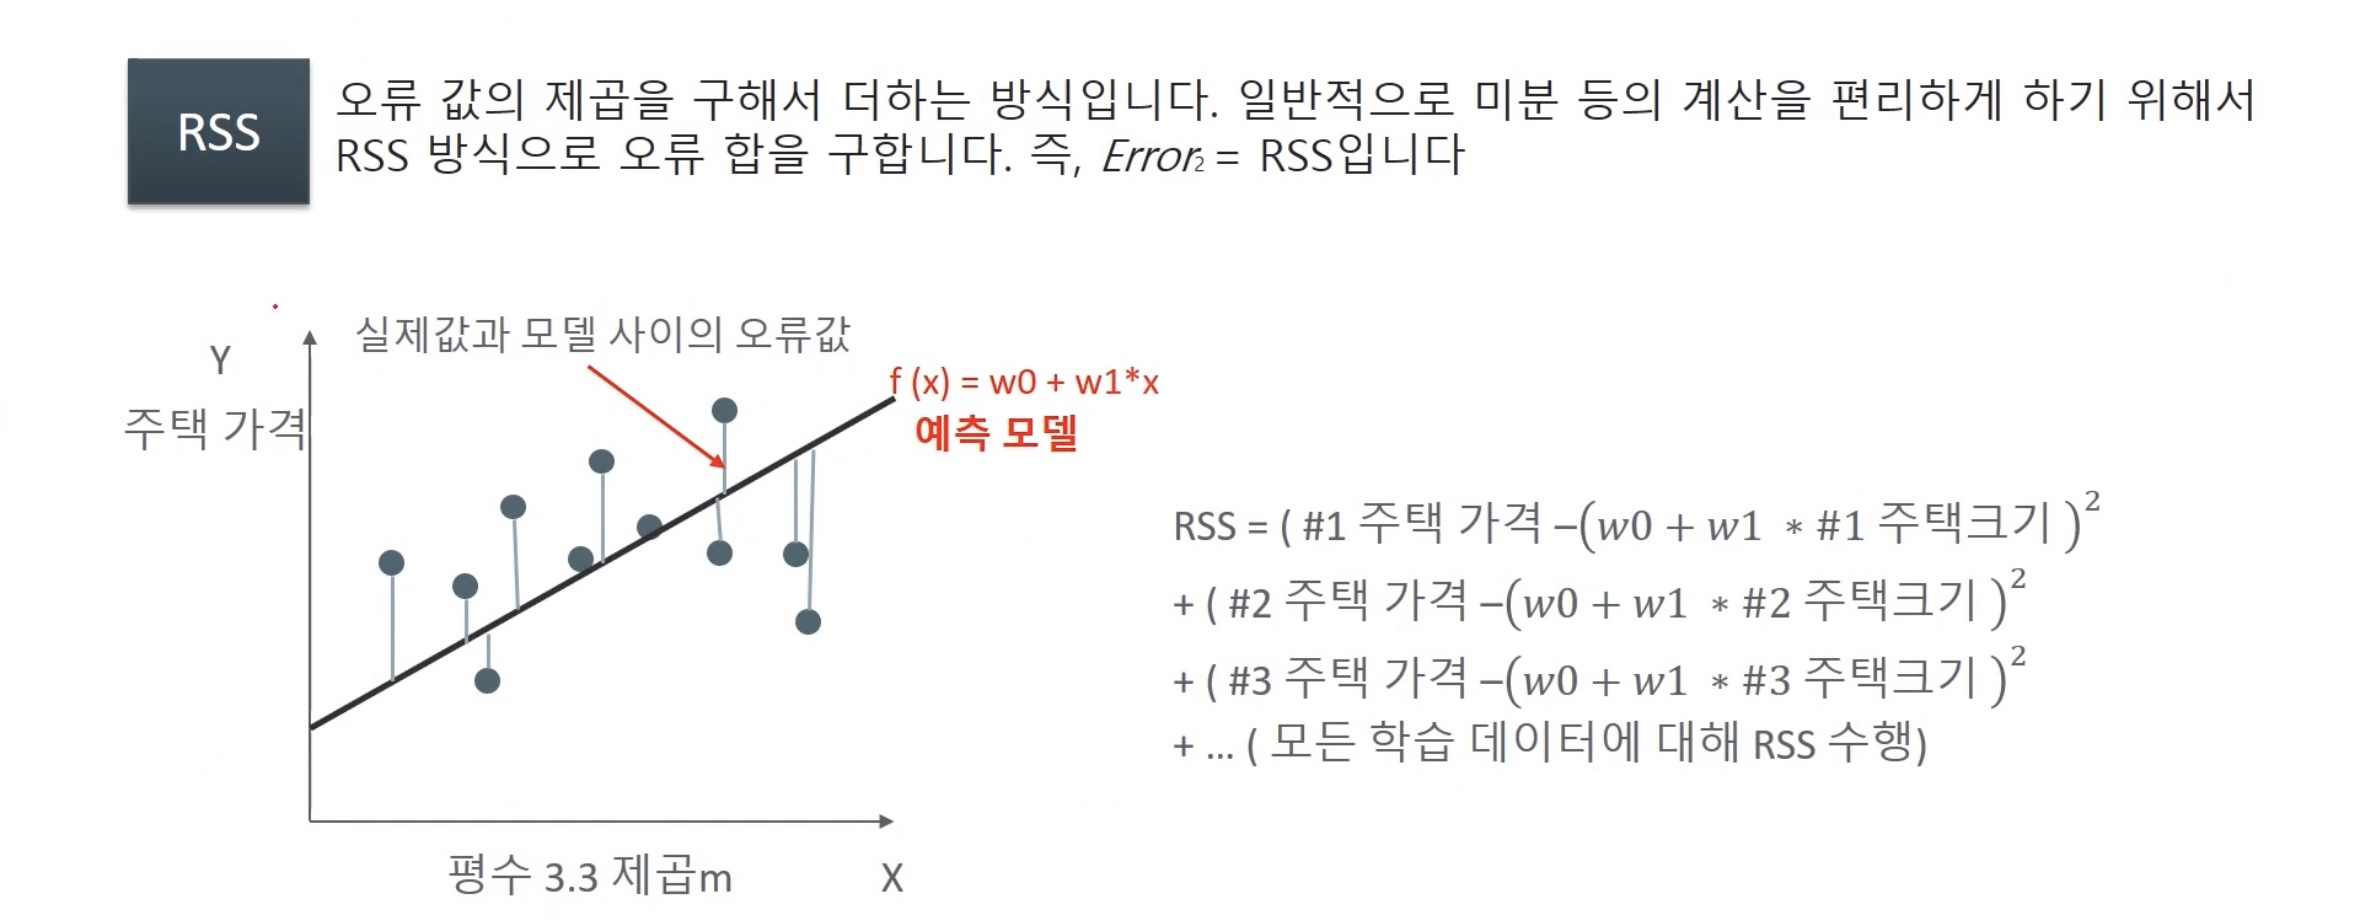

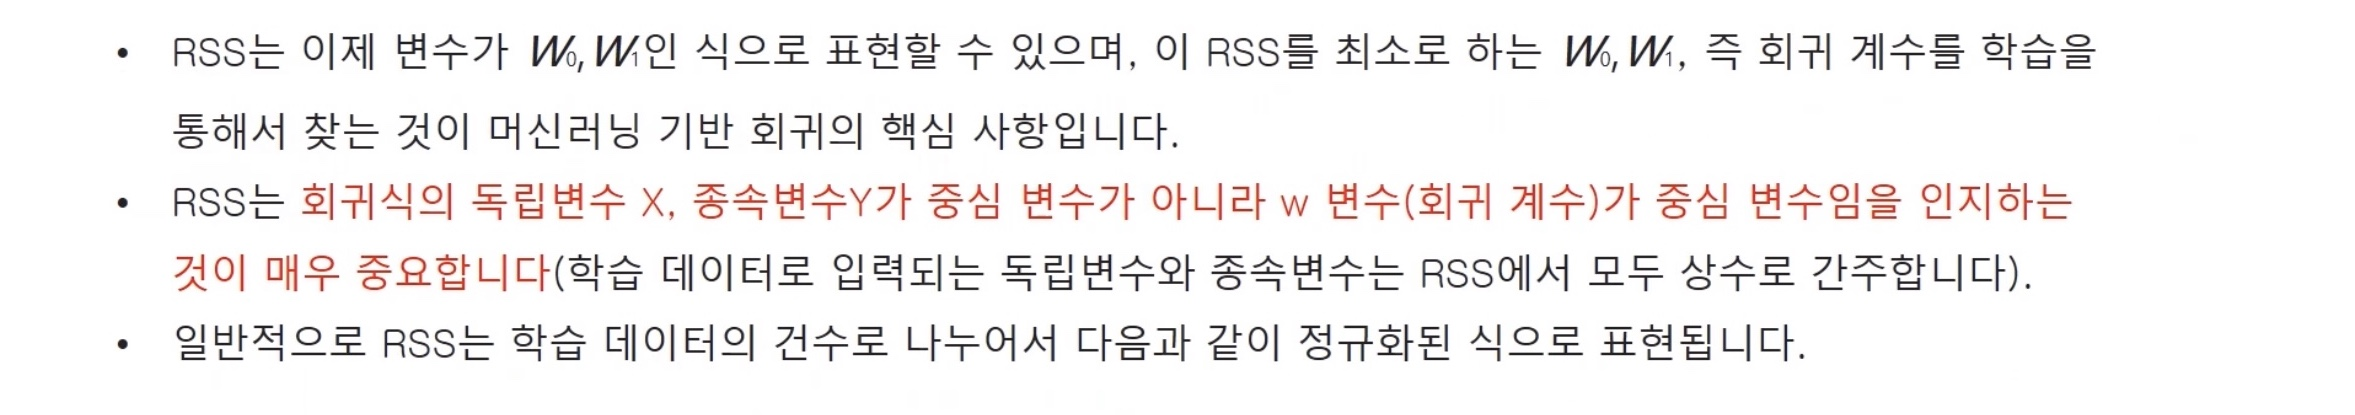

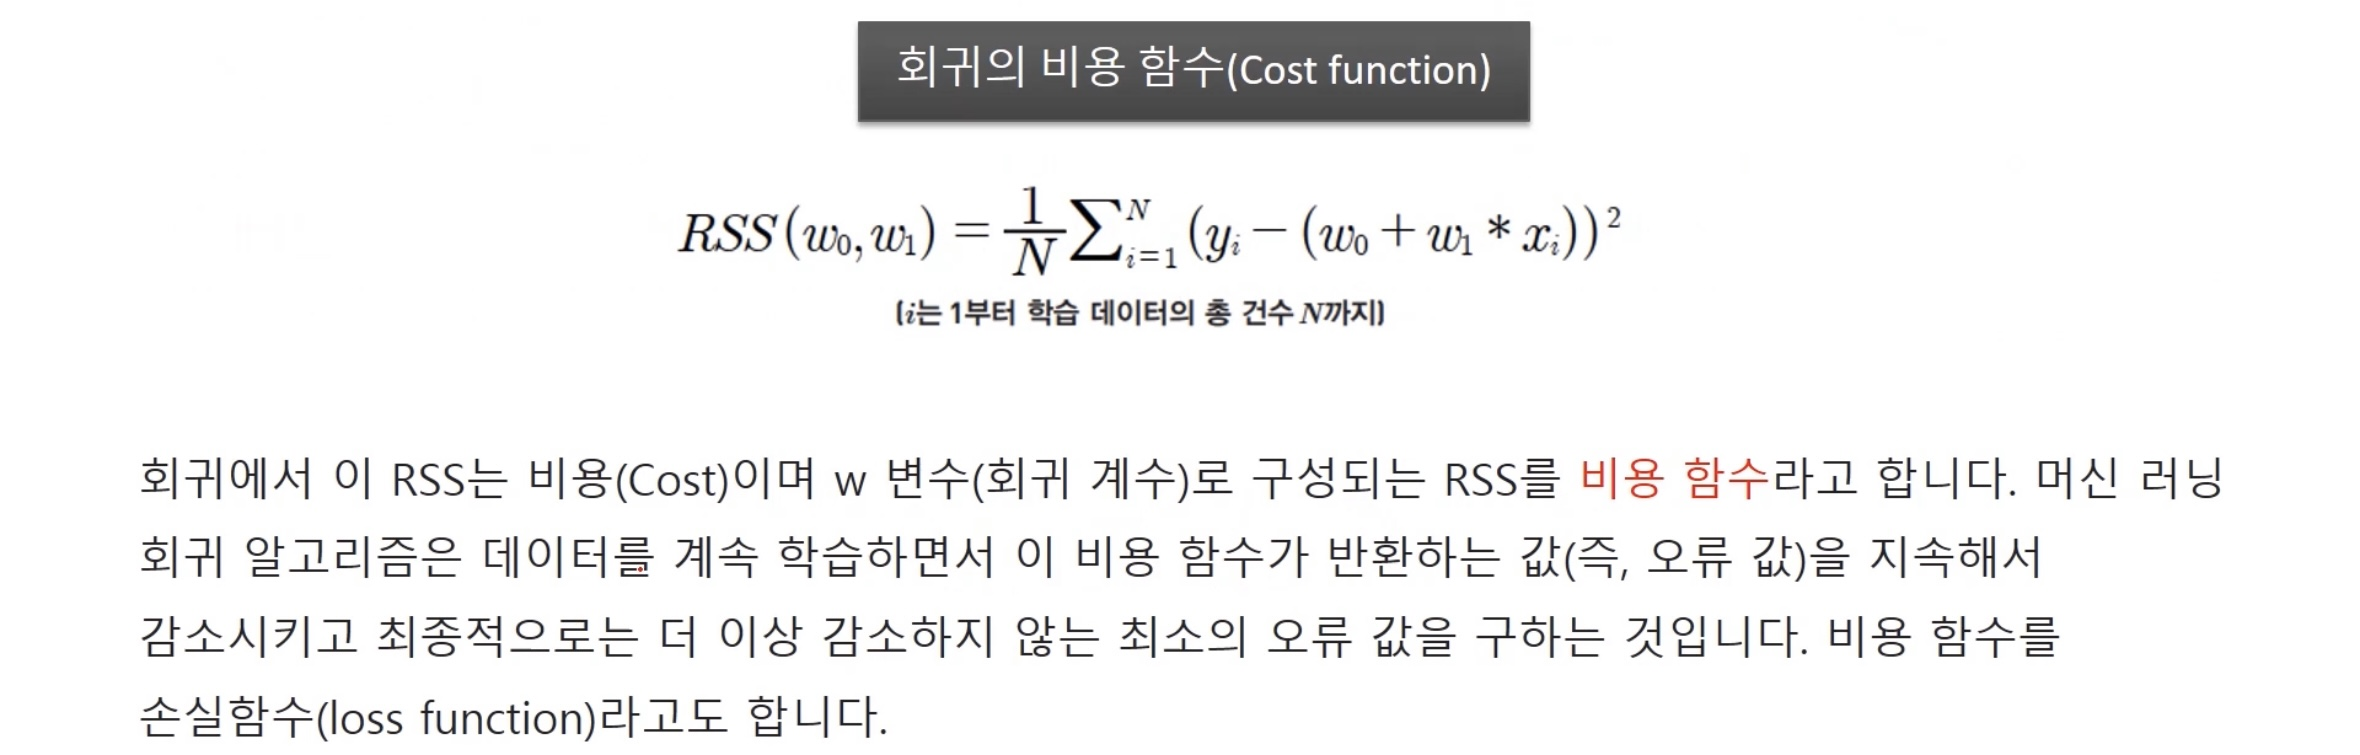

## 경사 하강법 (Gradient Desenct)
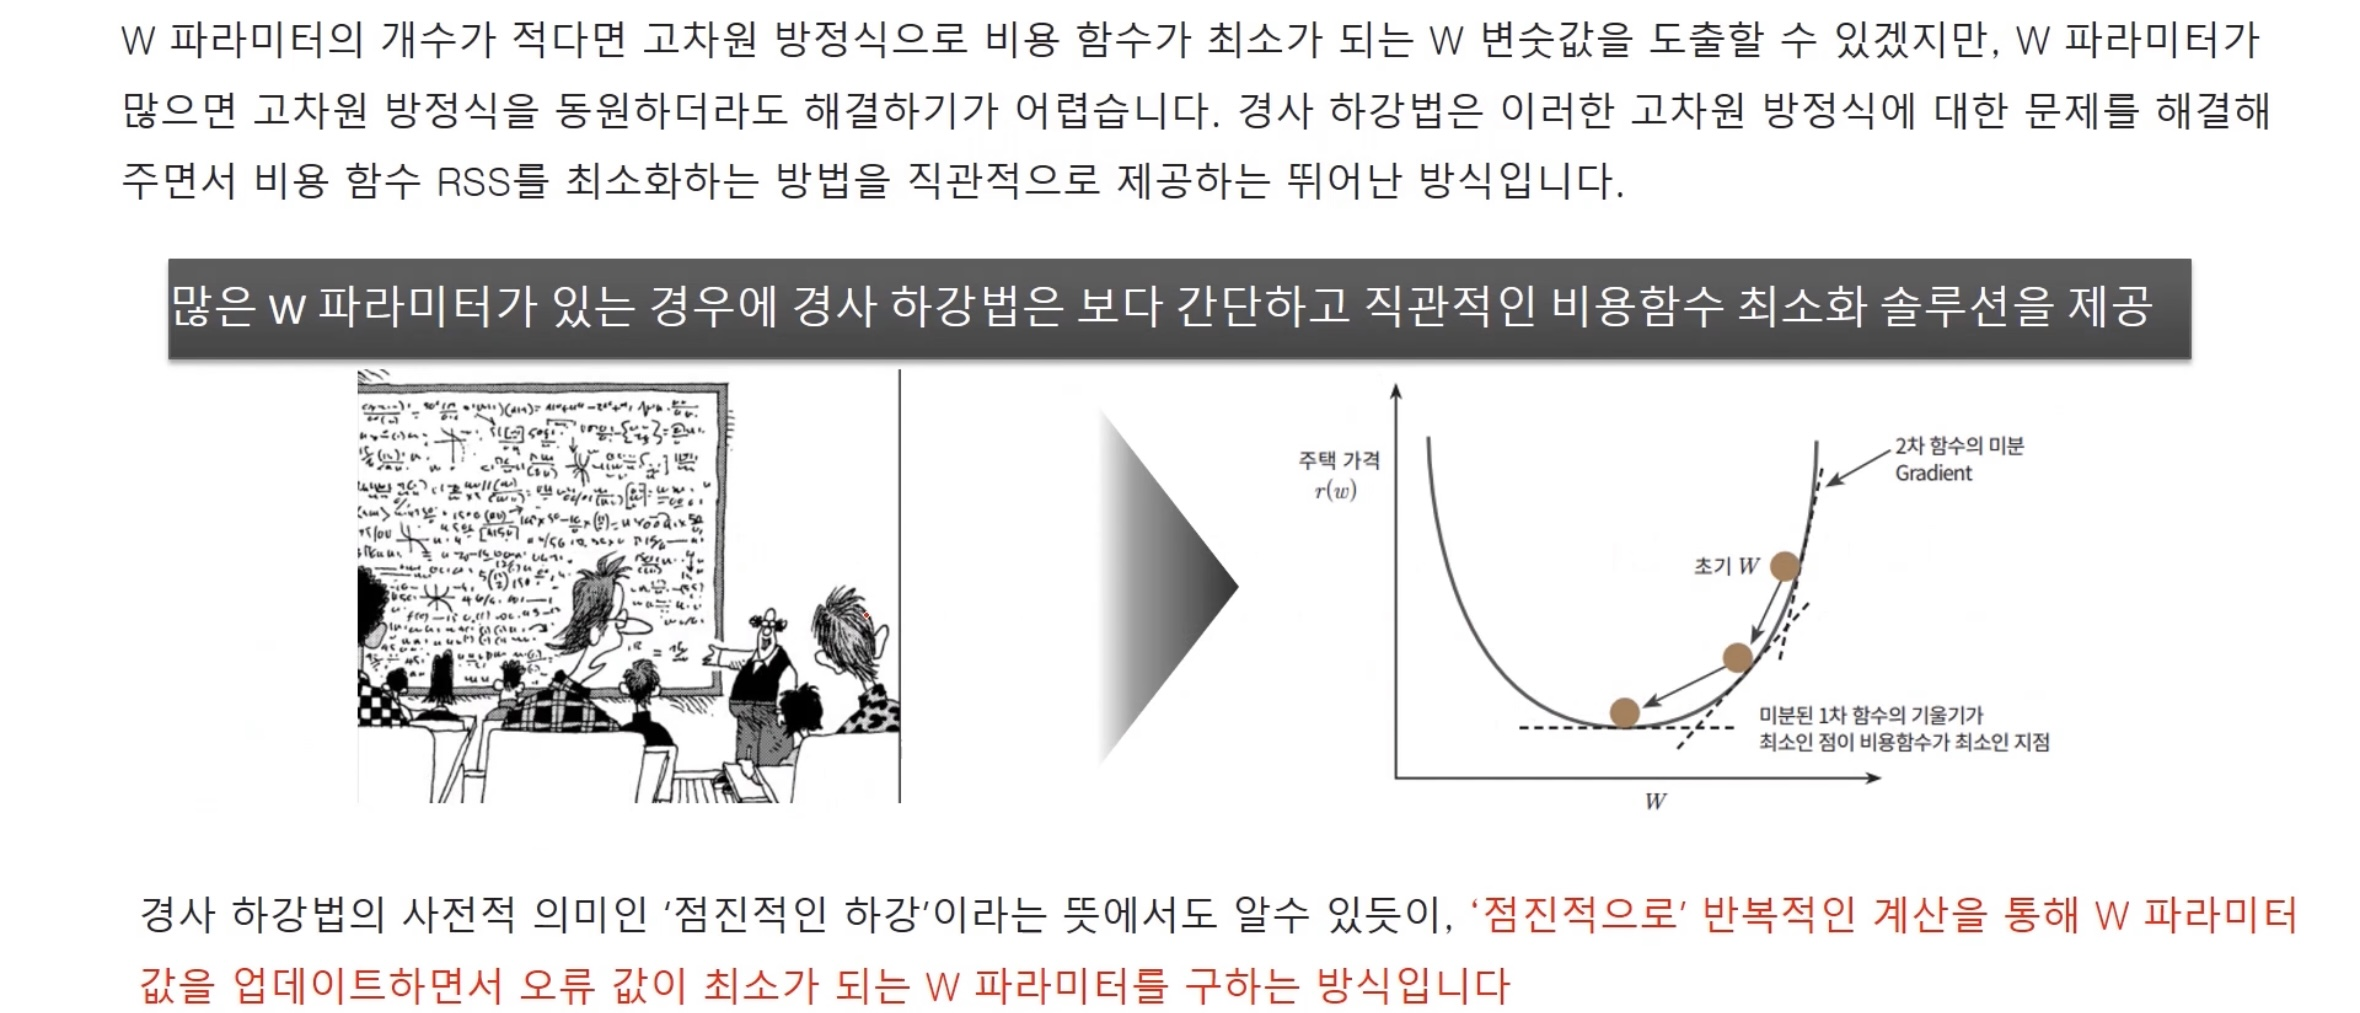

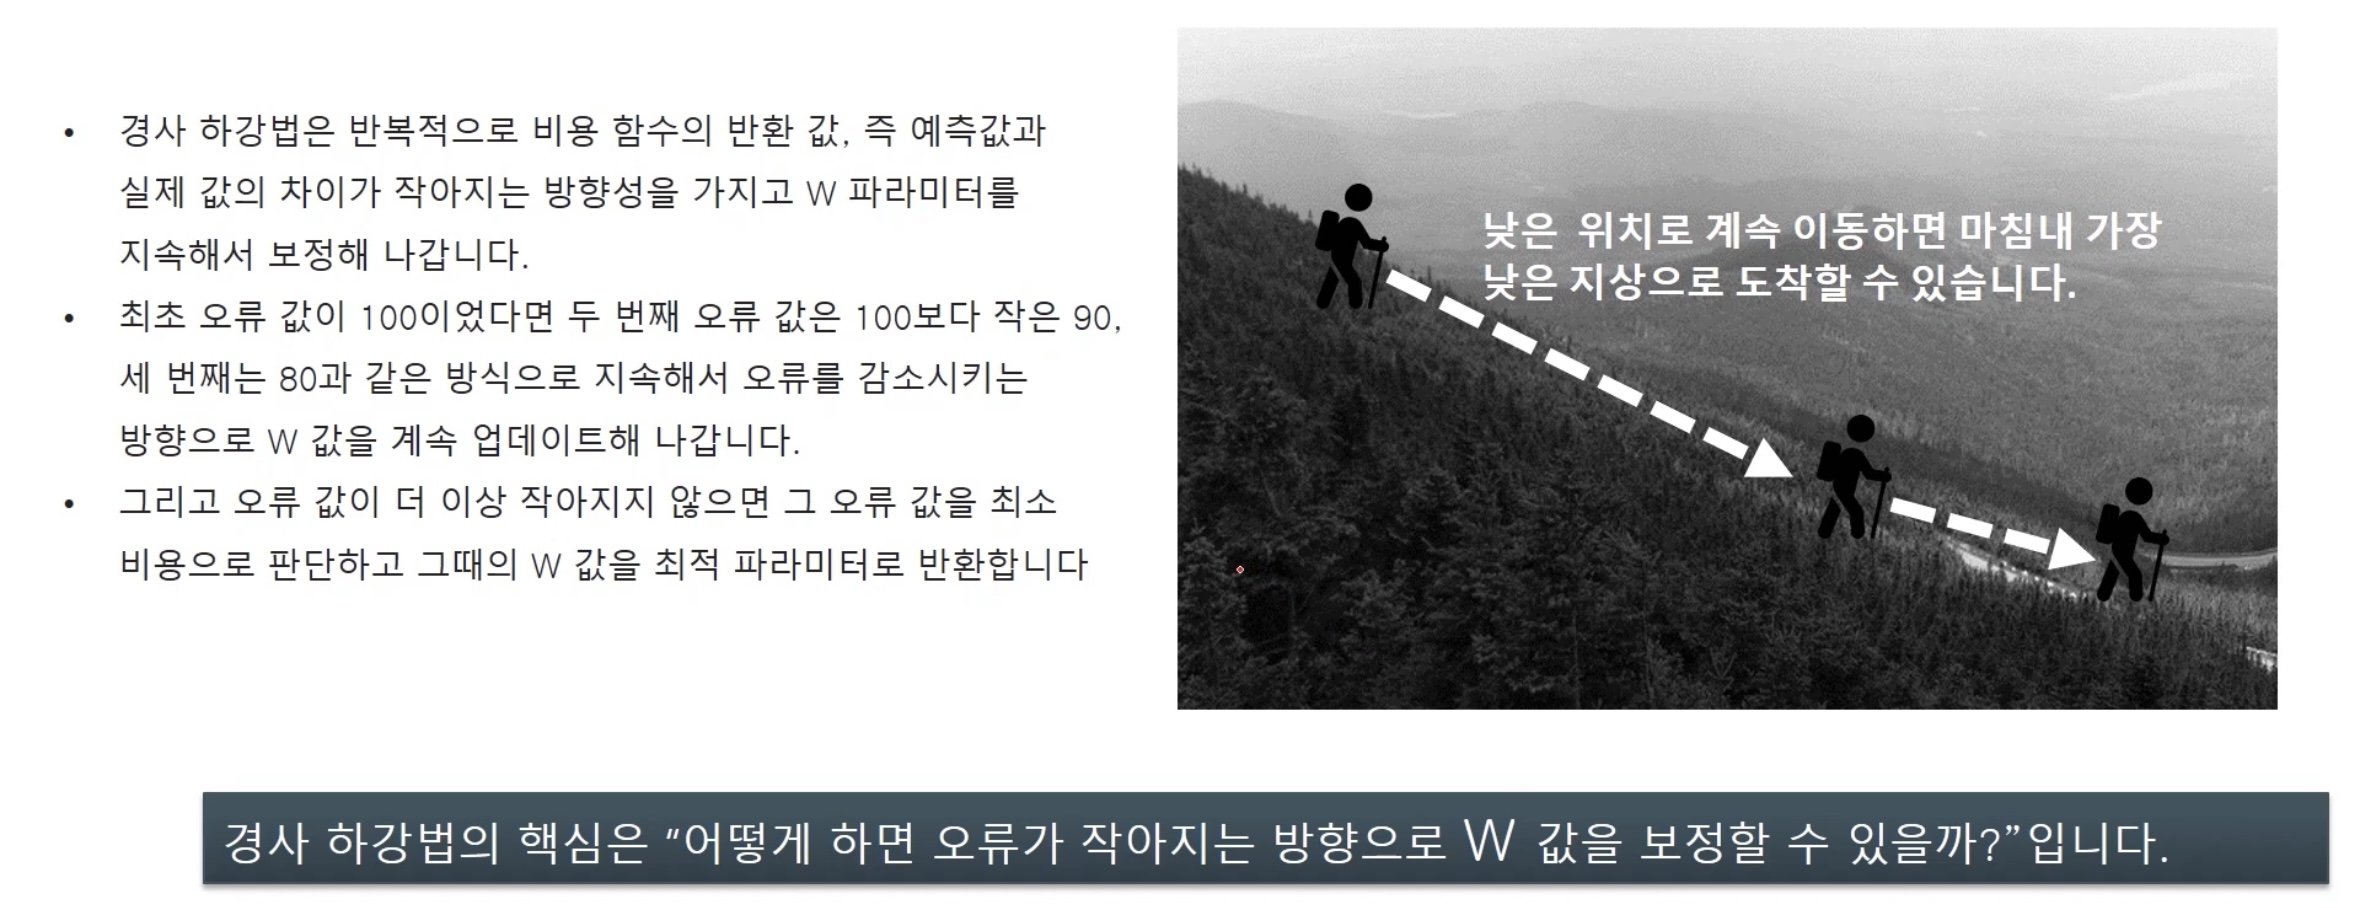

### 미분을 통해 비용 함수의 최소값을 찾기
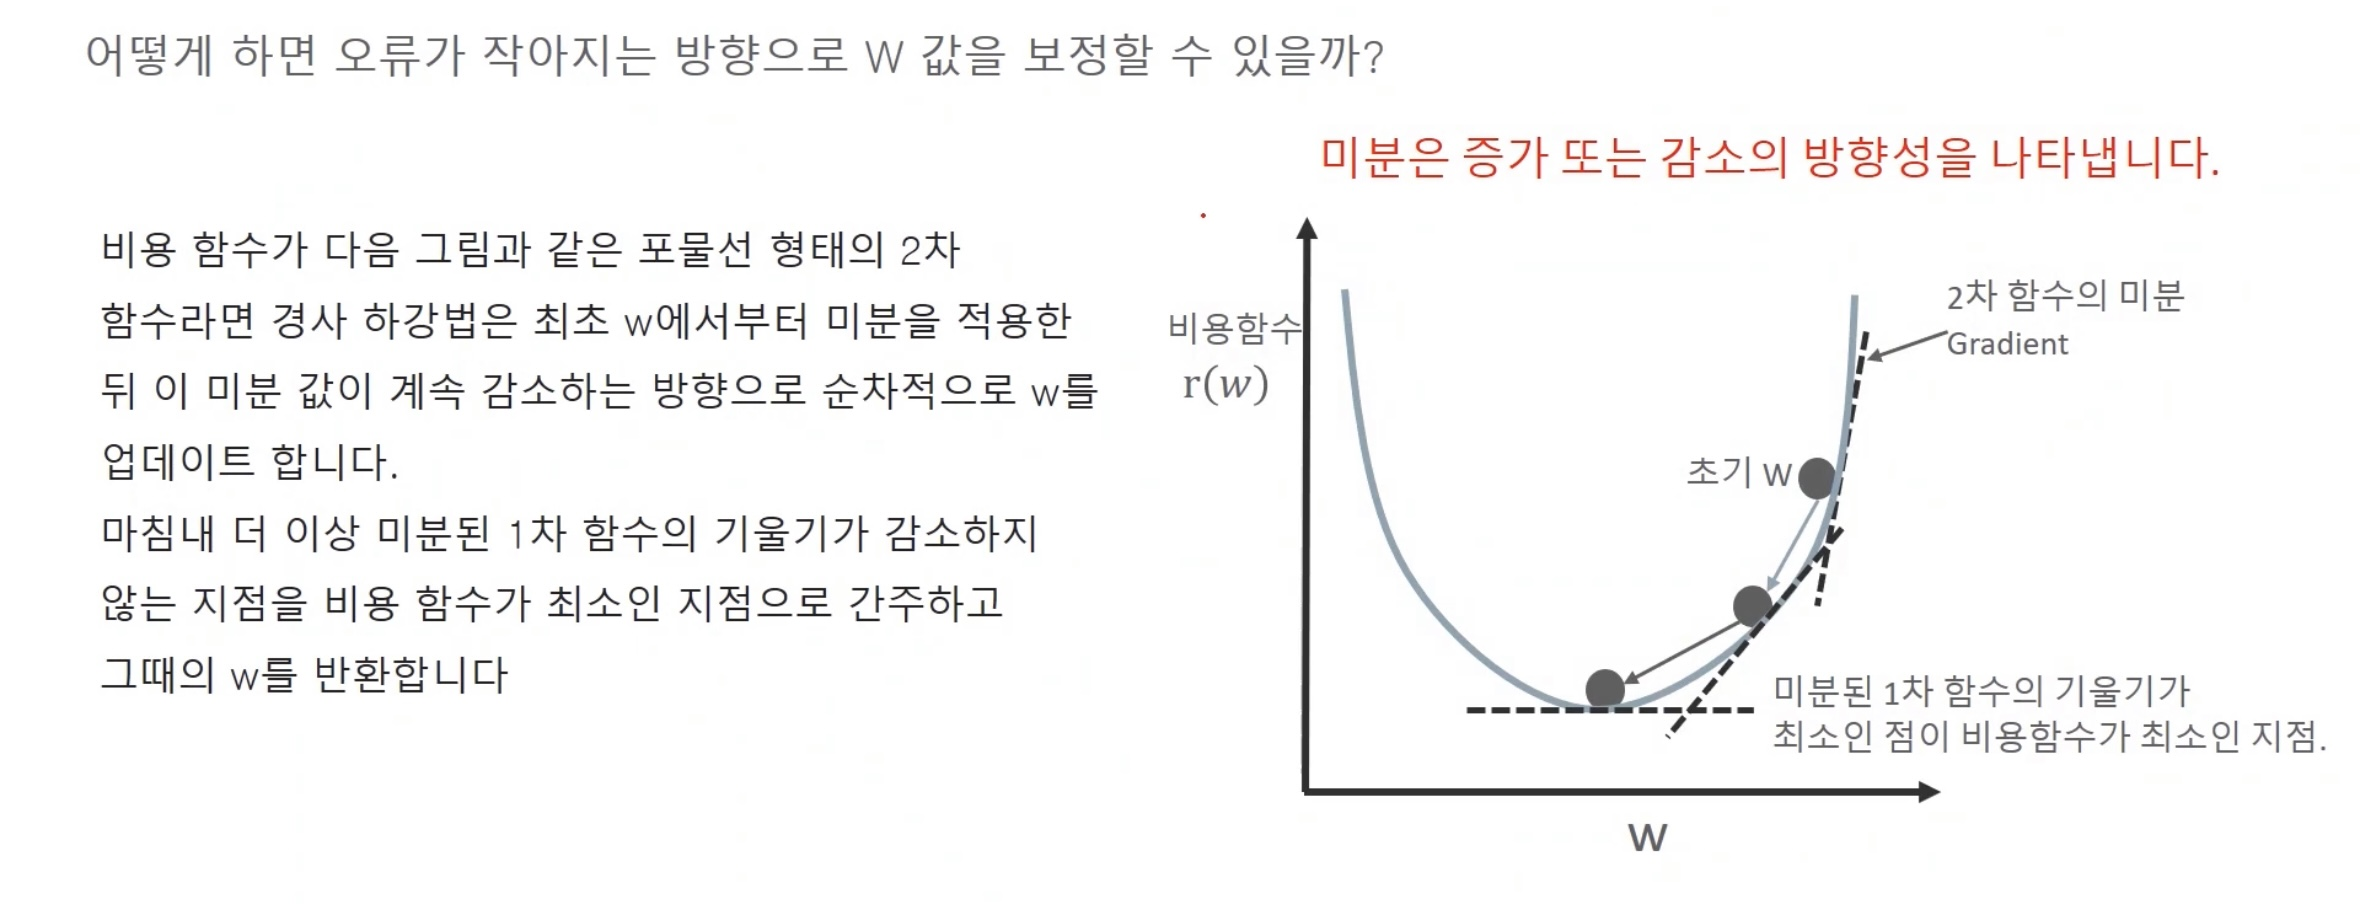

### RSS의 편미분

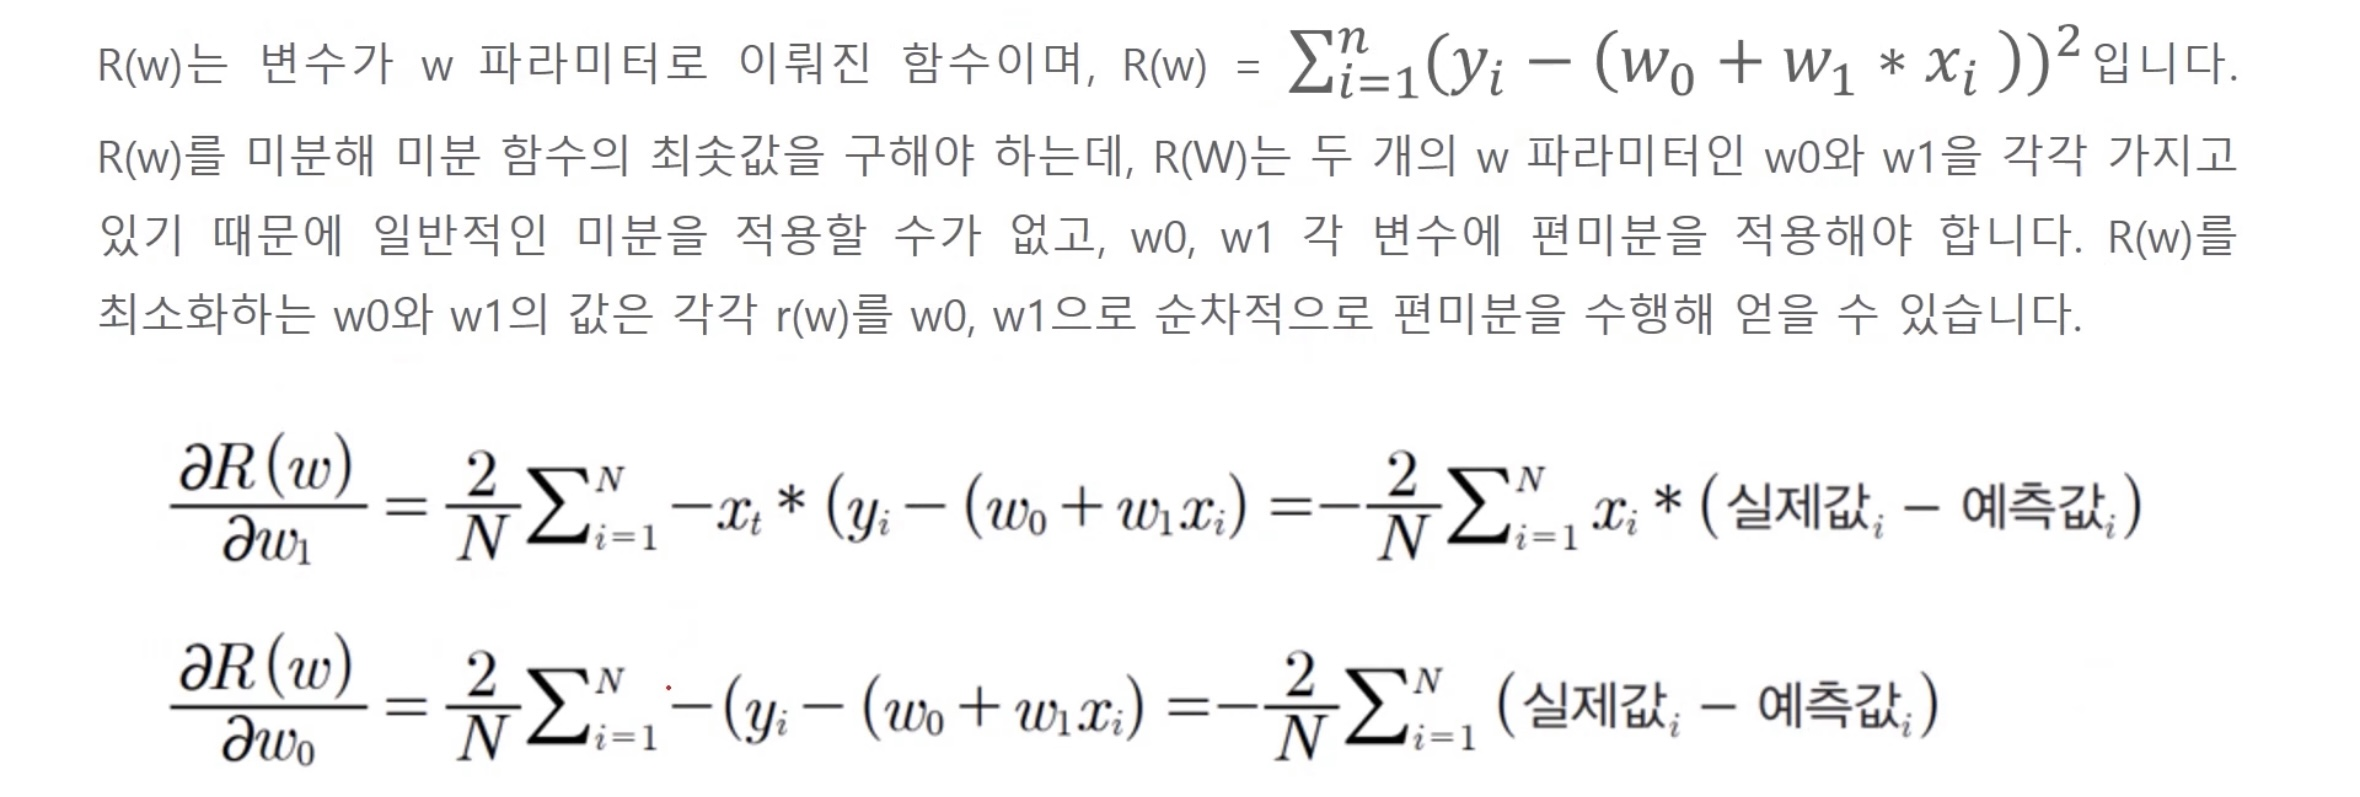

### 미분의 연쇄 법칙(Chain Rule) - 합성 함수의 미분
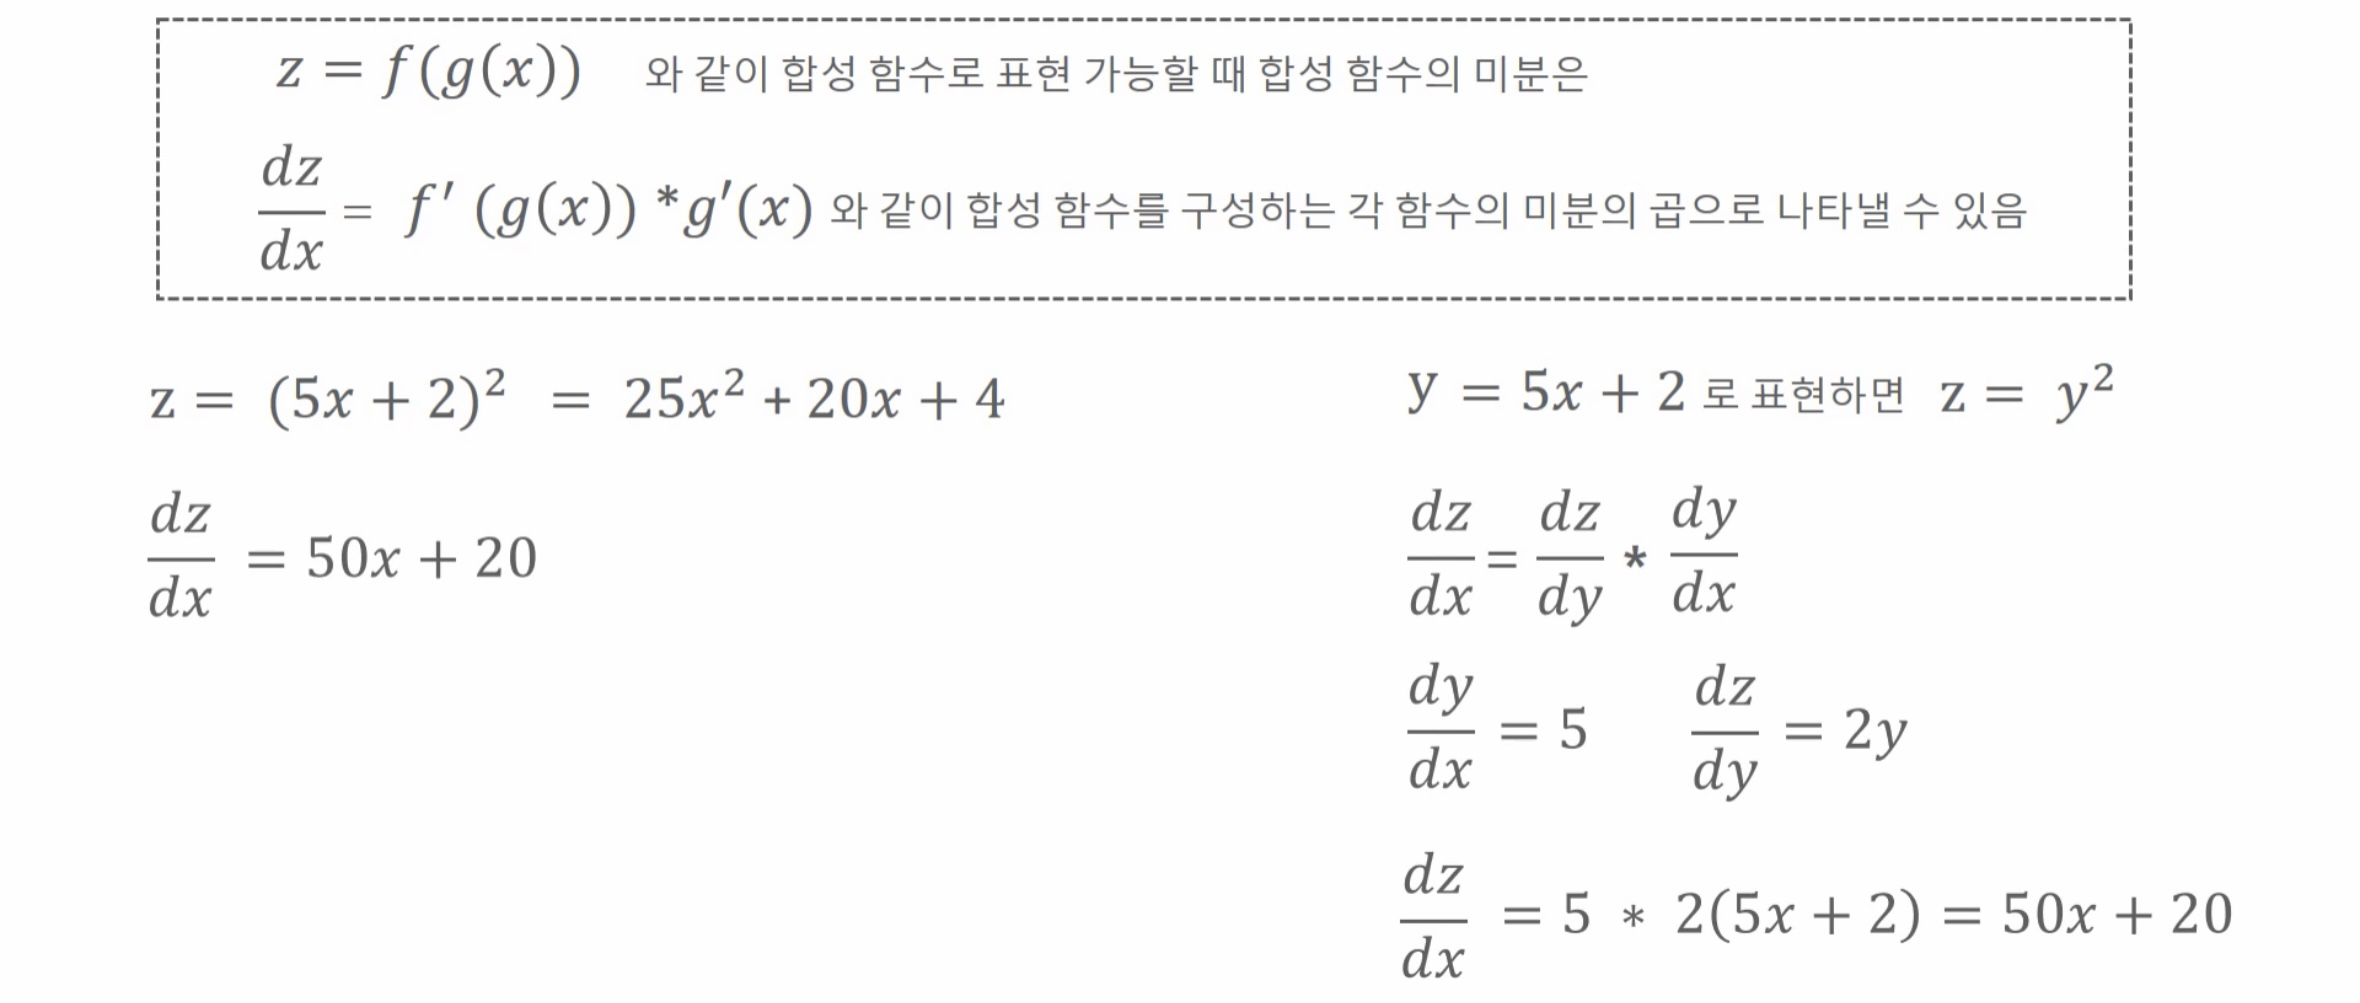

### 경사하강법 정리 
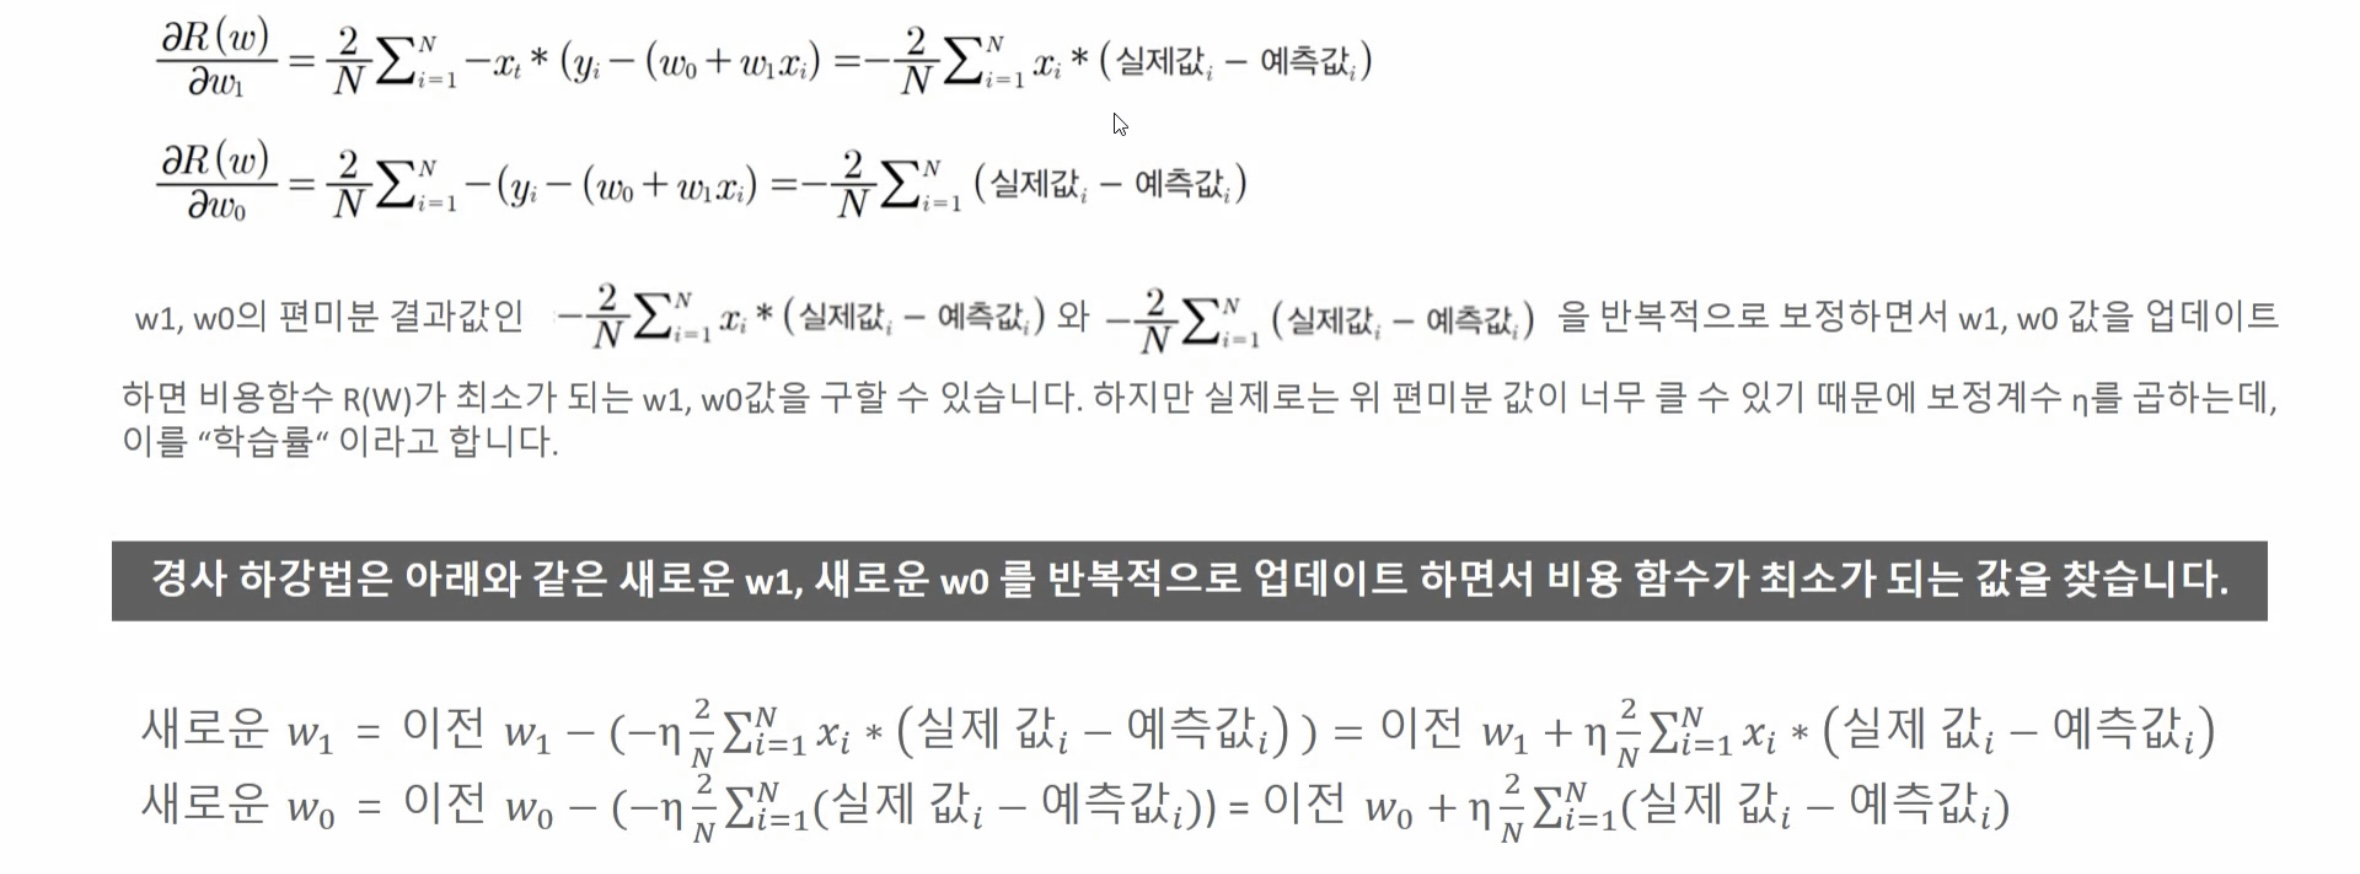

#### 실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성

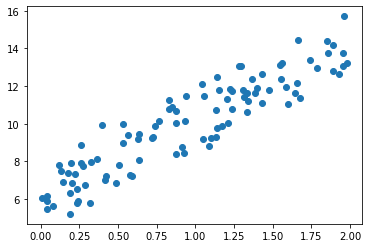

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

np.random.seed(0)
# y=4X+6 식을 근사(w1=4, w0=6), random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X,y)

In [3]:
X.shape, y.shape

((100, 1), (100, 1))

#### 경사하강법 수행 프로세스

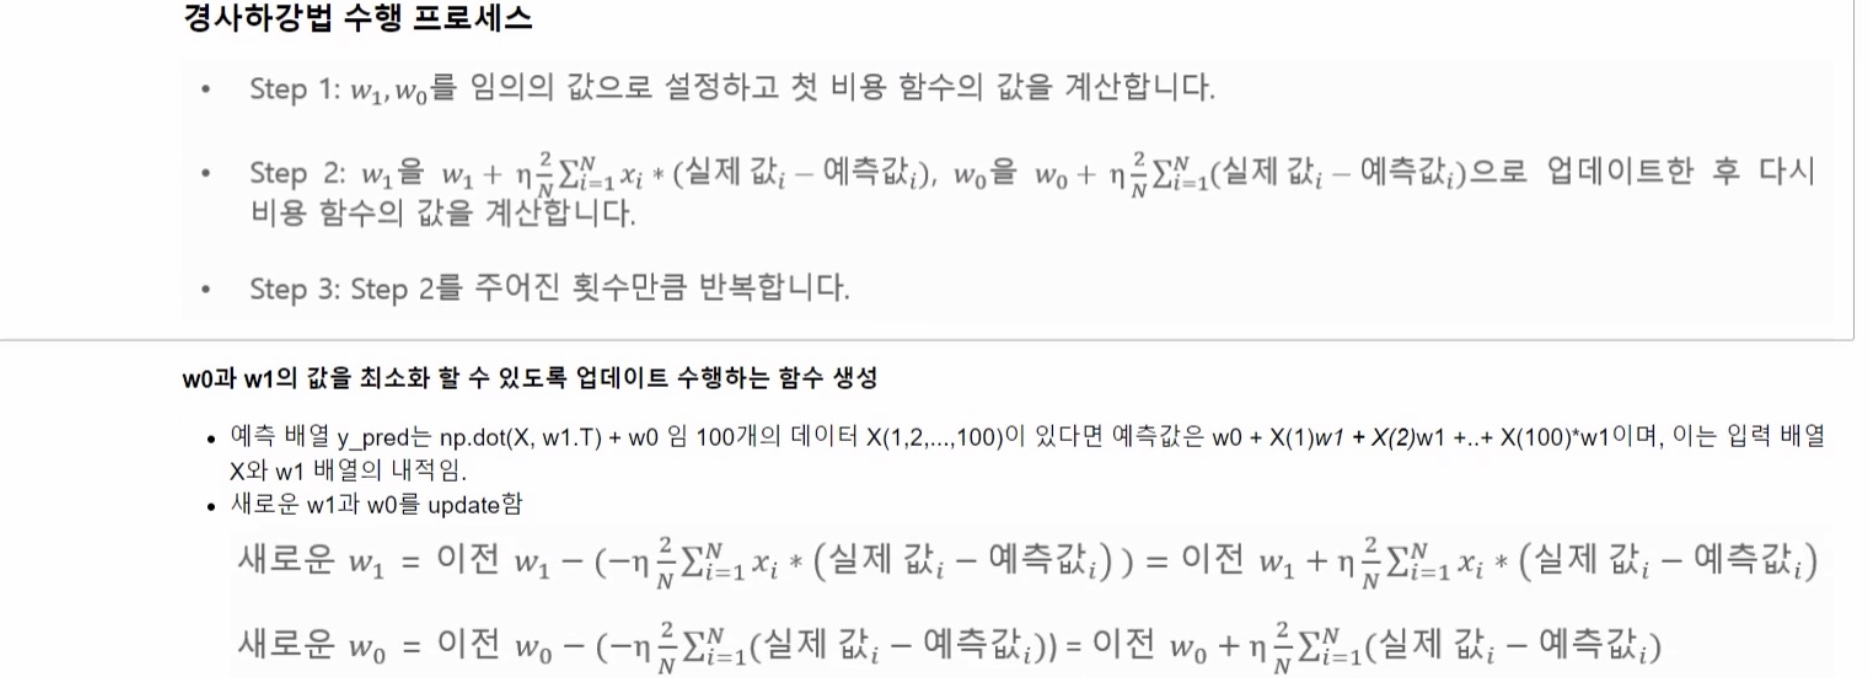

In [4]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화 
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산 
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate * (np.dot(X.T, diff)) # np.dot -> sum 
    w0_update = -(2/N)*learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [5]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y - y_pred
print(diff.shape)

(100, 1)


#### 반복적으로 경사 하강법을 이용하여 get_weight_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성

In [6]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1를 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

#### 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [7]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost 

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


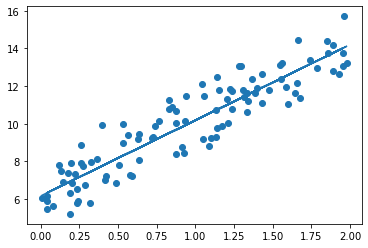

In [14]:
plt.scatter(X,y)
plt.plot(X, y_pred)

#### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출 

In [24]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0 
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트 
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [25]:
np.random.permutation(100)

array([18, 29, 64, 92, 72, 87,  5, 15, 12, 17, 61, 76,  9, 78, 80,  7, 33,
        6, 37, 74, 79,  1, 45, 28, 60, 52, 25, 39, 97, 44, 16, 55, 83, 49,
       22, 70, 47,  4, 82, 94, 53, 66, 26, 84, 31, 63,  8, 75, 98, 57, 71,
       99, 86, 96, 69, 24, 30, 13, 40, 56, 68, 95, 81, 19, 38, 91, 54, 32,
       51, 85, 11, 89, 90, 36, 65, 88, 41, 14, 27, 50, 20, 46, 67, 35, 62,
        2, 59, 23, 58, 43, 10,  0, 73, 21, 77, 42,  3, 93, 48, 34])

In [26]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), 'w0:',round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937
